# Impact of Medication for Lifestyle Diseases on Hospital Readmission

<h2><div style="font-family: Trebuchet MS; background-color: #176BA0; color: #FFFFFF; padding: 12px; line-height: 1.5;"> | Importing Libraries 📚</div> 

In [1]:
import pandas as pd #for reading datasets 
import numpy as np   #numerical operations
import matplotlib.pyplot as plt #datavisualiztion ploting a graph
import seaborn as sns

In [85]:
#reading dataset
df = pd.read_csv("C:\\Users\\LENOVO\\Downloads\\Train-1617360447408-1660719685476 (1).csv")
df

,index,encounter_id,patient_id,race,gender,age,weight,time_in_hospital,medical_specialty,num_lab_procedures,...,X19,X20,X21,X22,X23,X24,X25,change,diabetesMed,readmitted
0,69375,197029140,51521940,Hispanic,Male,[80-90),?,4,Emergency/Trauma,39,...,No,No,No,No,No,No,No,No,Yes,1
1,57272,163571946,92631357,Caucasian,Male,[60-70),?,3,Emergency/Trauma,34,...,No,No,No,No,No,No,No,No,No,0
2,82347,256497366,30023982,Caucasian,Female,[50-60),?,6,Nephrology,50,...,No,Down,No,No,No,No,No,Ch,Yes,1
3,89608,289891212,93606021,AfricanAmerican,Female,[70-80),?,5,?,63,...,No,Down,No,No,No,No,No,Ch,Yes,1
4,24091,81873900,23464296,Caucasian,Male,[70-80),?,9,Psychiatry,17,...,No,No,No,No,No,No,No,No,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66582,39934,124202466,23450508,Caucasian,Female,[70-80),?,11,InternalMedicine,40,...,No,Steady,No,No,No,No,No,No,Yes,0
66583,47366,145667070,29324601,Caucasian,Male,[80-90),?,4,?,39,...,No,No,No,No,No,No,No,No,No,1
66584,76555,231061116,2179062,Caucasian,Female,[60-70),?,2,?,24,...,No,No,No,No,No,No,No,No,Yes,1
66585,25392,84911682,20531754,?,Female,[80-90),?,4,InternalMedicine,39,...,No,No,No,No,No,No,No,No,No,0


<h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 48px; color: #19AADE; text-align: center; line-height: 1.25;"><b>🏬🔧 Data Pre-processing,<span style="color: #000000"> EDA & Feature Engineering 📉</span></b><br><span style="color: #19AADE; font-size: 24px">Fraud in auto insurance claims datasets </span></h1>
<hr>

In [4]:
df.shape

(66587, 49)

In [5]:
missing_values_count = df.isnull().sum()


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66587 entries, 0 to 66586
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               66587 non-null  int64  
 1   encounter_id        66587 non-null  int64  
 2   patient_id          66587 non-null  int64  
 3   race                66587 non-null  object 
 4   gender              66587 non-null  object 
 5   age                 66587 non-null  object 
 6   weight              66587 non-null  object 
 7   time_in_hospital    66587 non-null  int64  
 8   medical_specialty   66587 non-null  object 
 9   num_lab_procedures  66587 non-null  int64  
 10  num_procedures      66587 non-null  int64  
 11  num_medications     66587 non-null  int64  
 12  number_outpatient   66587 non-null  int64  
 13  number_emergency    66587 non-null  int64  
 14  number_inpatient    66587 non-null  int64  
 15  diag_1              66587 non-null  object 
 16  diag

<h2><div style="font-family: Trebuchet MS; background-color: #176BA0; color: #FFFFFF; padding: 12px; line-height: 1.5;">   CHEKING FOR NULL VALUES IN  DATASETS 📚</div>


In [7]:
# get the number of missing data points per column
missing_values_count = df.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count

index                 0
encounter_id          0
patient_id            0
race                  0
gender                0
age                   0
weight                0
time_in_hospital      0
medical_specialty     0
num_lab_procedures    0
num_procedures        0
num_medications       0
number_outpatient     0
number_emergency      0
number_inpatient      0
diag_1                0
diag_2                0
diag_3                0
diag_4                0
diag_5                0
number_diagnoses      0
X1                    0
X2                    0
X3                    0
X4                    0
X5                    0
X6                    0
X7                    0
X8                    0
X9                    0
X10                   0
X11                   0
X12                   0
X13                   0
X14                   0
X15                   0
X16                   0
X17                   0
X18                   0
X19                   0
X20                   0
X21             

In [82]:
#importing seaborn and missingno 
import seaborn as sns
import missingno as msno

C:\Users\LENOVO\cond\lib\site-packages\seaborn\matrix.py:305: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
C:\Users\LENOVO\cond\lib\site-packages\seaborn\matrix.py:305: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


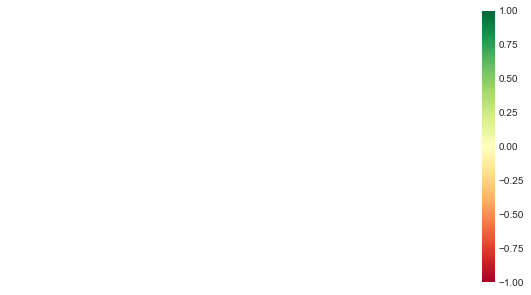

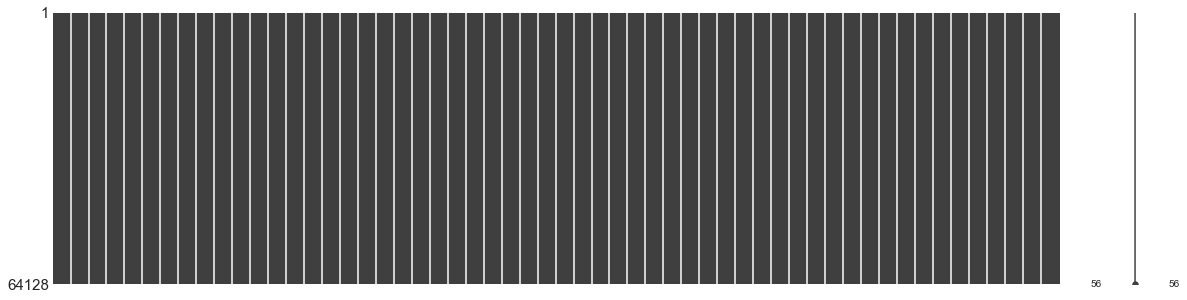

In [84]:
#finding correlation and missing values in train data
msno.heatmap(df, cmap="RdYlGn", figsize=(10,5), fontsize=12);
msno.matrix(df,figsize=(20,5), fontsize=12);

In [9]:
df = df.drop(['weight','medical_specialty'], axis = 1)

In [10]:
print('gender', df['gender'][df['gender'] == 'Unknown/Invalid'].count())

gender 2


In [11]:
drop_Idx = set(df[(df['diag_1'] == '?') & (df['diag_2'] == '?') & (df['diag_3'] == '?')].index)

drop_Idx = drop_Idx.union(set(df['diag_1'][df['diag_1'] == '?'].index))
drop_Idx = drop_Idx.union(set(df['diag_2'][df['diag_2'] == '?'].index))
drop_Idx = drop_Idx.union(set(df['diag_3'][df['diag_3'] == '?'].index))
drop_Idx = drop_Idx.union(set(df['race'][df['race'] == '?'].index))
drop_Idx = drop_Idx.union(set(df['gender'][df['gender'] == 'Unknown/Invalid'].index))
new_Idx = list(set(df.index) - set(drop_Idx))
df = df.iloc[new_Idx]

In [12]:
for col in df.columns:
    if df[col].dtype == object:
         print(col,df[col][df[col] == '?'].count())
            
print('gender', df['gender'][df['gender'] == 'Unknown/Invalid'].count())

race 0
gender 0
age 0
diag_1 0
diag_2 0
diag_3 0
diag_4 0
X1 0
X2 0
X3 0
X4 0
X5 0
X6 0
X7 0
X8 0
X9 0
X10 0
X11 0
X12 0
X13 0
X14 0
X15 0
X16 0
X17 0
X18 0
X19 0
X20 0
X21 0
X22 0
X23 0
X24 0
X25 0
change 0
diabetesMed 0
gender 0


In [13]:
df['service_utilization'] = df['number_outpatient'] + df['number_emergency'] + df['number_inpatient']

In [14]:
keys = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15','X16', 'X17', 'X18', 'X19', 'X20', 'X21','X22','X23','X24','X25']
for col in keys:
    colname = str(col) + 'temp'
    df[colname] = df[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)
df['numchange'] = 0
for col in keys:
    colname = str(col) + 'temp'
    df['numchange'] = df['numchange'] + df[colname]
    del df[colname]
    
df['numchange'].value_counts()

2    46498
3    16702
4      872
5       53
6        3
Name: numchange, dtype: int64

In [15]:
df.shape

(64128, 49)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64128 entries, 0 to 66586
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                64128 non-null  int64  
 1   encounter_id         64128 non-null  int64  
 2   patient_id           64128 non-null  int64  
 3   race                 64128 non-null  object 
 4   gender               64128 non-null  object 
 5   age                  64128 non-null  object 
 6   time_in_hospital     64128 non-null  int64  
 7   num_lab_procedures   64128 non-null  int64  
 8   num_procedures       64128 non-null  int64  
 9   num_medications      64128 non-null  int64  
 10  number_outpatient    64128 non-null  int64  
 11  number_emergency     64128 non-null  int64  
 12  number_inpatient     64128 non-null  int64  
 13  diag_1               64128 non-null  object 
 14  diag_2               64128 non-null  object 
 15  diag_3               64128 non-null 

In [17]:
for col in df.columns:
    if df[col].dtype == object:
         print(col,df[col][df[col] == '?'].count())

race 0
gender 0
age 0
diag_1 0
diag_2 0
diag_3 0
diag_4 0
X1 0
X2 0
X3 0
X4 0
X5 0
X6 0
X7 0
X8 0
X9 0
X10 0
X11 0
X12 0
X13 0
X14 0
X15 0
X16 0
X17 0
X18 0
X19 0
X20 0
X21 0
X22 0
X23 0
X24 0
X25 0
change 0
diabetesMed 0


<h2><div style="font-family: Trebuchet MS; background-color: #176BA0; color: #FFFFFF; padding: 12px; line-height: 1.5;">CATEGORICAL TO NUMERICAL ENCODING 📚</div>


In [18]:
df['change'] = df['change'].replace('Ch', 1)
df['change'] = df['change'].replace('No', 0)
df['gender'] = df['gender'].replace('Male', 1)
df['gender'] = df['gender'].replace('Female', 0)
df['diabetesMed'] = df['diabetesMed'].replace('Yes', 1)
df['diabetesMed'] = df['diabetesMed'].replace('No', 0)
# keys is the same as before
for col in keys:
    df[col] = df[col].replace('No', 0)
    df[col] = df[col].replace('Steady', 1)
    df[col] = df[col].replace('Up', 1)
    df[col] = df[col].replace('Down', 1)

In [19]:
# code age intervals [0-10) - [90-100) from 1-10
for i in range(0,10):
    df['age'] = df['age'].replace('['+str(10*i)+'-'+str(10*(i+1))+')', i+1)
df['age'].value_counts()

8     16465
7     14406
6     11022
9     10761
5      6048
4      2271
10     1786
3      1037
2       292
1        40
Name: age, dtype: int64

In [20]:
df2 = df.drop_duplicates(subset= ['patient_id'], keep = 'first')
df2.shape

(38078, 49)

In [21]:
df.head().T

,0,1,2,3,4
index,69375,57272,82347,89608,24091
encounter_id,197029140,163571946,256497366,289891212,81873900
patient_id,51521940,92631357,30023982,93606021,23464296
race,Hispanic,Caucasian,Caucasian,AfricanAmerican,Caucasian
gender,1,1,0,0,1
age,9,7,6,8,8
time_in_hospital,4,3,6,5,9
num_lab_procedures,39,34,50,63,17
num_procedures,1,1,2,0,1
num_medications,9,12,24,14,11


In [22]:
df['readmitted'].value_counts()

0    34128
1    30000
Name: readmitted, dtype: int64

In [23]:
# Creating additional columns for diagnosis# Creati 
df['level1_diag1'] = df['diag_1']
df['level2_diag1'] = df['diag_1']
df['level1_diag2'] = df['diag_2']
df['level2_diag2'] = df['diag_2']
df['level1_diag3'] = df['diag_3']
df['level2_diag3'] = df['diag_3']
df.loc[df['diag_1'].str.contains('V'), ['level1_diag1', 'level2_diag1']] = 0
df.loc[df['diag_1'].str.contains('E'), ['level1_diag1', 'level2_diag1']] = 0
df.loc[df['diag_2'].str.contains('V'), ['level1_diag2', 'level2_diag2']] = 0
df.loc[df['diag_2'].str.contains('E'), ['level1_diag2', 'level2_diag2']] = 0
df.loc[df['diag_3'].str.contains('V'), ['level1_diag3', 'level2_diag3']] = 0
df.loc[df['diag_3'].str.contains('E'), ['level1_diag3', 'level2_diag3']] = 0
df['level1_diag1'] = df['level1_diag1'].replace('?', -1)
df['level2_diag1'] = df['level2_diag1'].replace('?', -1)
df['level1_diag2'] = df['level1_diag2'].replace('?', -1)
df['level2_diag2'] = df['level2_diag2'].replace('?', -1)
df['level1_diag3'] = df['level1_diag3'].replace('?', -1)
df['level2_diag3'] = df['level2_diag3'].replace('?', -1)
df.loc[df['diag_1'].str.contains('V'), ['level1_diag1', 'level2_diag1']] = 0
df.loc[df['diag_1'].str.contains('E'), ['level1_diag1', 'level2_diag1']] = 0
df.loc[df['diag_2'].str.contains('V'), ['level1_diag2', 'level2_diag2']] = 0
df.loc[df['diag_2'].str.contains('E'), ['level1_diag2', 'level2_diag2']] = 0
df.loc[df['diag_3'].str.contains('V'), ['level1_diag3', 'level2_diag3']] = 0
df.loc[df['diag_3'].str.contains('E'), ['level1_diag3', 'level2_diag3']] = 0
df['level1_diag1'] = df['level1_diag1'].replace('?', -1)
df['level2_diag1'] = df['level2_diag1'].replace('?', -1)
df['level1_diag2'] = df['level1_diag2'].replace('?', -1)
df['level2_diag2'] = df['level2_diag2'].replace('?', -1)
df['level1_diag3'] = df['level1_diag3'].replace('?', -1)
df['level2_diag3'] = df['level2_diag3'].replace('?', -1)

In [24]:
df.loc[df['diag_1'].str.contains('V'), ['level1_diag1', 'level2_diag1']] = 0
df.loc[df['diag_1'].str.contains('E'), ['level1_diag1', 'level2_diag1']] = 0
df.loc[df['diag_2'].str.contains('V'), ['level1_diag2', 'level2_diag2']] = 0
df.loc[df['diag_2'].str.contains('E'), ['level1_diag2', 'level2_diag2']] = 0
df.loc[df['diag_3'].str.contains('V'), ['level1_diag3', 'level2_diag3']] = 0
df.loc[df['diag_3'].str.contains('E'), ['level1_diag3', 'level2_diag3']] = 0
df['level1_diag1'] = df['level1_diag1'].replace('?', -1)
df['level2_diag1'] = df['level2_diag1'].replace('?', -1)
df['level1_diag2'] = df['level1_diag2'].replace('?', -1)
df['level2_diag2'] = df['level2_diag2'].replace('?', -1)
df['level1_diag3'] = df['level1_diag3'].replace('?', -1)
df['level2_diag3'] = df['level2_diag3'].replace('?', -1)

In [25]:
df['level1_diag1'] = df['level1_diag1'].astype(float)
df['level2_diag1'] = df['level2_diag1'].astype(float)
df['level1_diag2'] = df['level1_diag2'].astype(float)
df['level2_diag2'] = df['level2_diag2'].astype(float)
df['level1_diag3'] = df['level1_diag3'].astype(float)
df['level2_diag3'] = df['level2_diag3'].astype(float)

In [26]:
for index, row in df.iterrows():
    if (row['level2_diag1'] >= 390 and row['level2_diag1'] < 399):
        df.loc[index, 'level2_diag1'] = 1
    elif (row['level2_diag1'] >= 401 and row['level2_diag1'] < 415):
        df.loc[index, 'level2_diag1'] = 2
    elif (row['level2_diag1'] >= 415 and row['level2_diag1'] < 460):
        df.loc[index, 'level2_diag1'] = 3
    elif (np.floor(row['level2_diag1']) == 785):
        df.loc[index, 'level2_diag1'] = 4
    elif (row['level2_diag1'] >= 460 and row['level2_diag1'] < 489):
        df.loc[index, 'level2_diag1'] = 5
    elif (row['level2_diag1'] >= 490 and row['level2_diag1'] < 497):
        df.loc[index, 'level2_diag1'] = 6
    elif (row['level2_diag1'] >= 500 and row['level2_diag1'] < 520):
        df.loc[index, 'level2_diag1'] = 7
    elif (np.floor(row['level2_diag1']) == 786):
        df.loc[index, 'level2_diag1'] = 8
    elif (row['level2_diag1'] >= 520 and row['level2_diag1'] < 530):
        df.loc[index, 'level2_diag1'] = 9
    elif (row['level2_diag1'] >= 530 and row['level2_diag1'] < 544):
        df.loc[index, 'level2_diag1'] = 10
    elif (row['level2_diag1'] >= 550 and row['level2_diag1'] < 554):
        df.loc[index, 'level2_diag1'] = 11
    elif (row['level2_diag1'] >= 555 and row['level2_diag1'] < 580):
        df.loc[index, 'level2_diag1'] = 12
    elif (np.floor(row['level2_diag1']) == 787):
        df.loc[index, 'level2_diag1'] = 13
    elif (np.floor(row['level2_diag1']) == 250):
        df.loc[index, 'level2_diag1'] = 14
    elif (row['level2_diag1'] >= 800 and row['level2_diag1'] < 1000):
        df.loc[index, 'level2_diag1'] = 15
    elif (row['level2_diag1'] >= 710 and row['level2_diag1'] < 740):
        df.loc[index, 'level2_diag1'] = 16
    elif (row['level2_diag1'] >= 580 and row['level2_diag1'] < 630):
        df.loc[index, 'level2_diag1'] = 17
    elif (np.floor(row['level2_diag1']) == 788):
        df.loc[index, 'level2_diag1'] = 18
    elif (row['level2_diag1'] >= 140 and row['level2_diag1'] < 240):
        df.loc[index, 'level2_diag1'] = 19
    elif row['level2_diag1'] >= 240 and row['level2_diag1'] < 280 and (np.floor(row['level2_diag1']) != 250):
        df.loc[index, 'level2_diag1'] = 20
    elif (row['level2_diag1'] >= 680 and row['level2_diag1'] < 710) or (np.floor(row['level2_diag1']) == 782):
        df.loc[index, 'level2_diag1'] = 21
    elif (row['level2_diag1'] >= 290 and row['level2_diag1'] < 320):
        df.loc[index, 'level2_diag1'] = 22
    else:
        df.loc[index, 'level2_diag1'] = 0
        
    if (row['level2_diag2'] >= 390 and row['level2_diag2'] < 399):
        df.loc[index, 'level2_diag2'] = 1
    elif (row['level2_diag2'] >= 401 and row['level2_diag2'] < 415):
        df.loc[index, 'level2_diag2'] = 2
    elif (row['level2_diag2'] >= 415 and row['level2_diag2'] < 460):
        df.loc[index, 'level2_diag2'] = 3
    elif (np.floor(row['level2_diag2']) == 785):
        df.loc[index, 'level2_diag2'] = 4
    elif (row['level2_diag2'] >= 460 and row['level2_diag2'] < 489):
        df.loc[index, 'level2_diag2'] = 5
    elif (row['level2_diag2'] >= 490 and row['level2_diag2'] < 497):
        df.loc[index, 'level2_diag2'] = 6
    elif (row['level2_diag2'] >= 500 and row['level2_diag2'] < 520):
        df.loc[index, 'level2_diag2'] = 7
    elif (np.floor(row['level2_diag2']) == 786):
        df.loc[index, 'level2_diag2'] = 8
    elif (row['level2_diag2'] >= 520 and row['level2_diag2'] < 530):
        df.loc[index, 'level2_diag2'] = 9
    elif (row['level2_diag2'] >= 530 and row['level2_diag2'] < 544):
        df.loc[index, 'level2_diag2'] = 10
    elif (row['level2_diag2'] >= 550 and row['level2_diag2'] < 554):
        df.loc[index, 'level2_diag2'] = 11
    elif (row['level2_diag2'] >= 555 and row['level2_diag2'] < 580):
        df.loc[index, 'level2_diag2'] = 12
    elif (np.floor(row['level2_diag2']) == 787):
        df.loc[index, 'level2_diag2'] = 13
    elif (np.floor(row['level2_diag2']) == 250):
        df.loc[index, 'level2_diag2'] = 14
    elif (row['level2_diag2'] >= 800 and row['level2_diag2'] < 1000):
        df.loc[index, 'level2_diag2'] = 15
    elif (row['level2_diag2'] >= 710 and row['level2_diag2'] < 740):
        df.loc[index, 'level2_diag2'] = 16
    elif (row['level2_diag2'] >= 580 and row['level2_diag2'] < 630):
        df.loc[index, 'level2_diag2'] = 17
    elif (np.floor(row['level2_diag2']) == 788):
        df.loc[index, 'level2_diag2'] = 18
    elif (row['level2_diag2'] >= 140 and row['level2_diag2'] < 240):
        df.loc[index, 'level2_diag2'] = 19
    elif row['level2_diag2'] >= 240 and row['level2_diag2'] < 280 and (np.floor(row['level2_diag2']) != 250):
        df.loc[index, 'level2_diag2'] = 20
    elif (row['level2_diag2'] >= 680 and row['level2_diag2'] < 710) or (np.floor(row['level2_diag2']) == 782):
        df.loc[index, 'level2_diag2'] = 21
    elif (row['level2_diag2'] >= 290 and row['level2_diag2'] < 320):
        df.loc[index, 'level2_diag2'] = 22
    else:
        df.loc[index, 'level2_diag2'] = 0
        
        
    if (row['level2_diag3'] >= 390 and row['level2_diag3'] < 399):
        df.loc[index, 'level2_diag3'] = 1
    elif (row['level2_diag3'] >= 401 and row['level2_diag3'] < 415):
        df.loc[index, 'level2_diag3'] = 2
    elif (row['level2_diag3'] >= 415 and row['level2_diag3'] < 460):
        df.loc[index, 'level2_diag3'] = 3
    elif (np.floor(row['level2_diag3']) == 785):
        df.loc[index, 'level2_diag3'] = 4
    elif (row['level2_diag3'] >= 460 and row['level2_diag3'] < 489):
        df.loc[index, 'level2_diag3'] = 5
    elif (row['level2_diag3'] >= 490 and row['level2_diag3'] < 497):
        df.loc[index, 'level2_diag3'] = 6
    elif (row['level2_diag3'] >= 500 and row['level2_diag3'] < 520):
        df.loc[index, 'level2_diag3'] = 7
    elif (np.floor(row['level2_diag3']) == 786):
        df.loc[index, 'level2_diag3'] = 8
    elif (row['level2_diag3'] >= 520 and row['level2_diag3'] < 530):
        df.loc[index, 'level2_diag3'] = 9
    elif (row['level2_diag3'] >= 530 and row['level2_diag3'] < 544):
        df.loc[index, 'level2_diag3'] = 10
    elif (row['level2_diag3'] >= 550 and row['level2_diag3'] < 554):
        df.loc[index, 'level2_diag3'] = 11
    elif (row['level2_diag3'] >= 555 and row['level2_diag3'] < 580):
        df.loc[index, 'level2_diag3'] = 12
    elif (np.floor(row['level2_diag3']) == 787):
        df.loc[index, 'level2_diag3'] = 13
    elif (np.floor(row['level2_diag3']) == 250):
        df.loc[index, 'level2_diag3'] = 14
    elif (row['level2_diag3'] >= 800 and row['level2_diag3'] < 1000):
        df.loc[index, 'level2_diag3'] = 15
    elif (row['level2_diag3'] >= 710 and row['level2_diag3'] < 740):
        df.loc[index, 'level2_diag3'] = 16
    elif (row['level2_diag3'] >= 580 and row['level2_diag3'] < 630):
        df.loc[index, 'level2_diag3'] = 17
    elif (np.floor(row['level2_diag3']) == 788):
        df.loc[index, 'level2_diag3'] = 18
    elif (row['level2_diag3'] >= 140 and row['level2_diag3'] < 240):
        df.loc[index, 'level2_diag3'] = 19
    elif row['level2_diag3'] >= 240 and row['level2_diag3'] < 280 and (np.floor(row['level2_diag3']) != 250):
        df.loc[index, 'level2_diag3'] = 20
    elif (row['level2_diag3'] >= 680 and row['level2_diag3'] < 710) or (np.floor(row['level2_diag3']) == 782):
        df.loc[index, 'level2_diag3'] = 21
    elif (row['level2_diag3'] >= 290 and row['level2_diag3'] < 320):
        df.loc[index, 'level2_diag3'] = 22
    else:
        df.loc[index, 'level2_diag3'] = 0

In [27]:
df

,index,encounter_id,patient_id,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,diabetesMed,readmitted,service_utilization,numchange,level1_diag1,level2_diag1,level1_diag2,level2_diag2,level1_diag3,level2_diag3
0,69375,197029140,51521940,Hispanic,1,9,4,39,1,9,...,1,1,6,2,783.0,0.0,403.00,2.0,585.0,17.0
1,57272,163571946,92631357,Caucasian,1,7,3,34,1,12,...,0,0,0,2,564.0,12.0,788.00,18.0,569.0,12.0
2,82347,256497366,30023982,Caucasian,0,6,6,50,2,24,...,1,1,5,3,574.0,12.0,403.00,2.0,585.0,17.0
3,89608,289891212,93606021,AfricanAmerican,0,8,5,63,0,14,...,1,1,0,3,401.0,2.0,783.00,0.0,250.0,14.0
4,24091,81873900,23464296,Caucasian,1,8,9,17,1,11,...,0,1,0,2,311.0,22.0,276.00,20.0,300.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66581,4840,26333250,7209585,Caucasian,0,8,1,10,1,11,...,0,0,0,2,433.0,3.0,250.01,14.0,401.0,2.0
66582,39934,124202466,23450508,Caucasian,0,8,11,40,4,35,...,1,0,0,2,562.0,12.0,276.00,20.0,458.0,3.0
66583,47366,145667070,29324601,Caucasian,1,9,4,39,1,7,...,0,1,0,2,188.0,19.0,599.00,17.0,591.0,17.0
66584,76555,231061116,2179062,Caucasian,0,7,2,24,1,13,...,1,1,2,2,996.0,15.0,414.00,2.0,250.0,14.0


<h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 48px; color: #19AADE; text-align: center; line-height: 1.25;"><b> DATA VISUALIZATION 📊 <span style="color: #000000"></span></b></h1>
<hr>

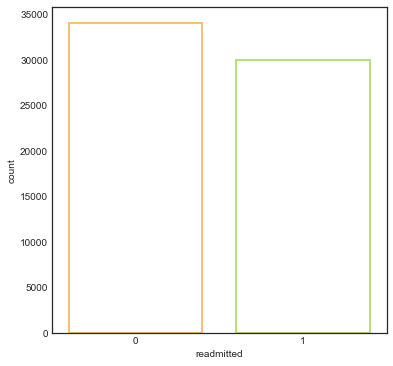

In [78]:
#visualizing plot using bodilyinjuries
plt.style.use('seaborn-white')
plt.figure(figsize=(6,6))

#seaborn ploting a countplot
sns.countplot(x=df['readmitted'] , order = df['readmitted'].value_counts().index ,color="green", facecolor=(1, 1, 1, 1),
                   linewidth=2, edgecolor=sns.color_palette("RdYlGn", 2))
# ploting a countplot
plt.show()

Text(0.5, 1.0, 'Time in Hospital VS. Readmission')

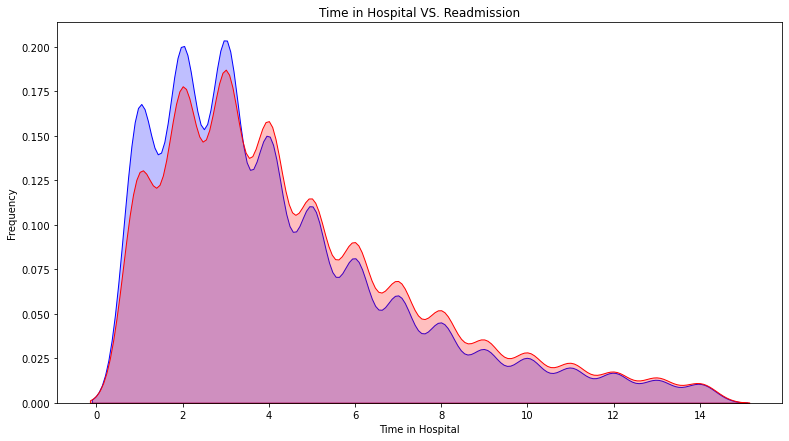

In [29]:
fig = plt.figure(figsize=(13,7),)
ax=sns.kdeplot(df.loc[(df['readmitted'] == 0),'time_in_hospital'] , color='b',shade=True,label='Not Readmitted')
ax=sns.kdeplot(df.loc[(df['readmitted'] == 1),'time_in_hospital'] , color='r',shade=True, label='Readmitted')
ax.set(xlabel='Time in Hospital', ylabel='Frequency')
plt.title('Time in Hospital VS. Readmission')

Text(0.5, 1.0, 'Age of Patient VS. Readmission')

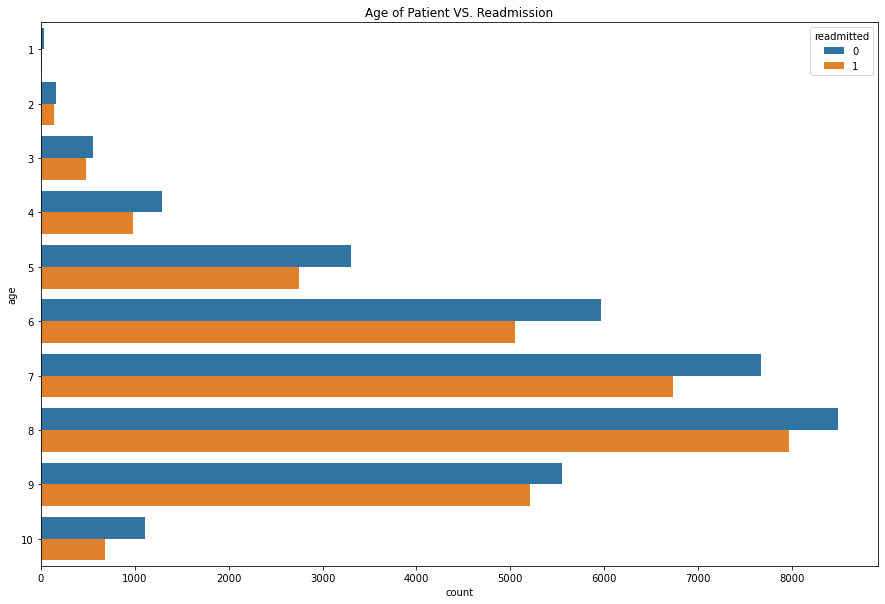

In [30]:
fig = plt.figure(figsize=(15,10))
sns.countplot(y= df['age'], hue = df['readmitted']).set_title('Age of Patient VS. Readmission')

<AxesSubplot:xlabel='count', ylabel='race'>

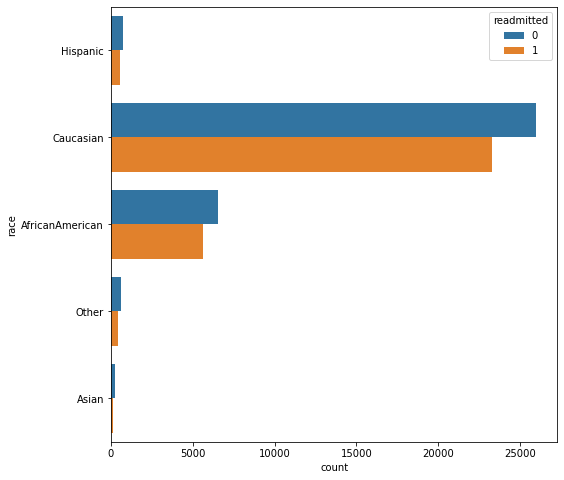

In [31]:
fig = plt.figure(figsize=(8,8))
sns.countplot(y = df['race'], hue = df['readmitted'])

Text(0.5, 1.0, 'Number of medication used VS. Readmission')

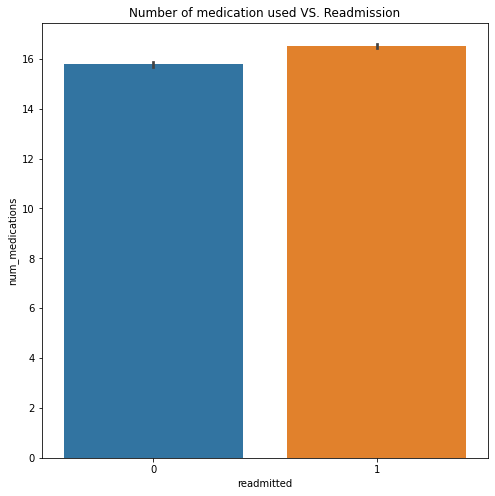

In [32]:
fig = plt.figure(figsize=(8,8))
sns.barplot(x = df['readmitted'], y = df['num_medications']).set_title("Number of medication used VS. Readmission")

C:\Users\LENOVO\cond\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Gender of Patient VS. Readmission')

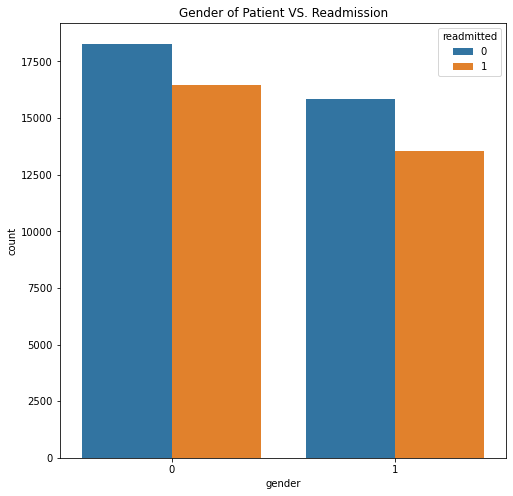

In [33]:
fig = plt.figure(figsize=(8,8))
sns.countplot(df['gender'], hue = df['readmitted']).set_title("Gender of Patient VS. Readmission")

C:\Users\LENOVO\cond\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Change of Medication VS. Readmission')

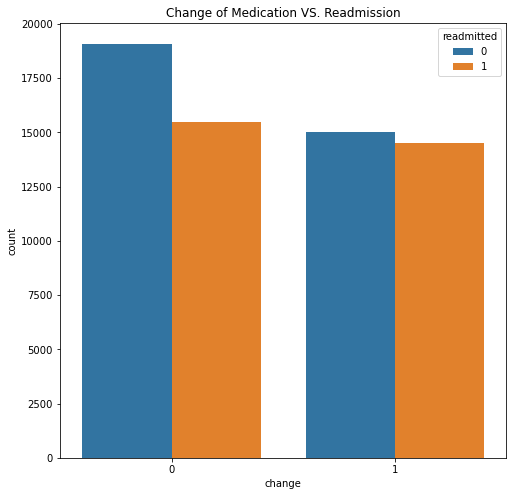

In [34]:
fig = plt.figure(figsize=(8,8))
sns.countplot(df['change'], hue = df['readmitted']).set_title('Change of Medication VS. Readmission')

C:\Users\LENOVO\cond\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Diabetes Medication prescribed VS Readmission')

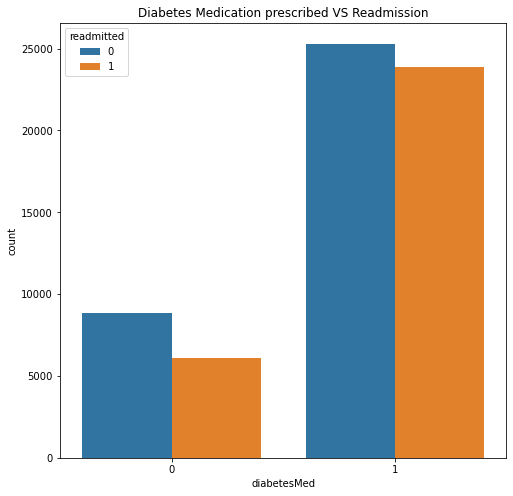

In [35]:
fig = plt.figure(figsize=(8,8))
sns.countplot(df['diabetesMed'], hue = df['readmitted']).set_title('Diabetes Medication prescribed VS Readmission')

Text(0.5, 1.0, 'Service Utilization VS. Readmission')

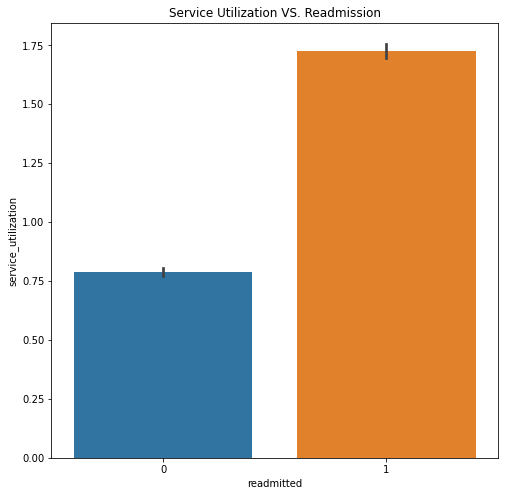

In [36]:
fig = plt.figure(figsize=(8,8))
sns.barplot( y = df['service_utilization'], x = df['readmitted']).set_title('Service Utilization VS. Readmission')

Text(0.5, 1.0, 'Number of lab procedure VS. Readmission')

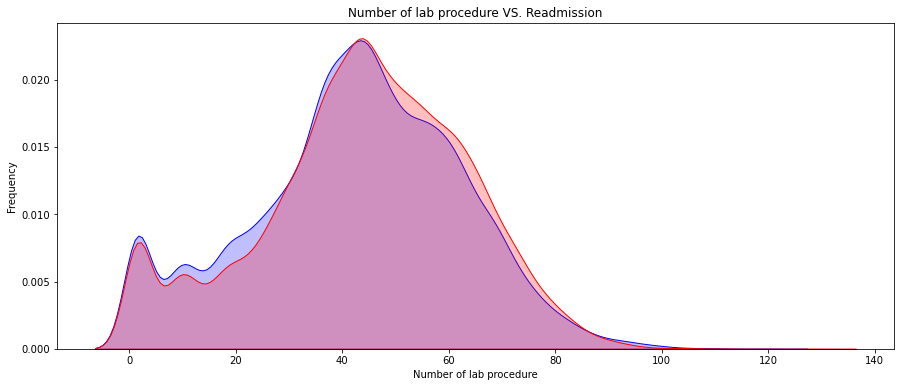

In [37]:
fig = plt.figure(figsize=(15,6),)
ax=sns.kdeplot(df.loc[(df['readmitted'] == 0),'num_lab_procedures'] , color='b',shade=True,label='Not readmitted')
ax=sns.kdeplot(df.loc[(df['readmitted'] == 1),'num_lab_procedures'] , color='r',shade=True, label='readmitted')
ax.set(xlabel='Number of lab procedure', ylabel='Frequency')
plt.title('Number of lab procedure VS. Readmission')

In [38]:
df['age'] = df['age'].astype('int64')
print(df.age.value_counts())
# convert age categories to mid-point values
age_dict = {1:5, 2:15, 3:25, 4:35, 5:45, 6:55, 7:65, 8:75, 9:85, 10:95}
df['age'] = df.age.map(age_dict)
print(df.age.value_counts())

8     16465
7     14406
6     11022
9     10761
5      6048
4      2271
10     1786
3      1037
2       292
1        40
Name: age, dtype: int64
75    16465
65    14406
55    11022
85    10761
45     6048
35     2271
95     1786
25     1037
15      292
5        40
Name: age, dtype: int64


In [39]:
df

,index,encounter_id,patient_id,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,diabetesMed,readmitted,service_utilization,numchange,level1_diag1,level2_diag1,level1_diag2,level2_diag2,level1_diag3,level2_diag3
0,69375,197029140,51521940,Hispanic,1,85,4,39,1,9,...,1,1,6,2,783.0,0.0,403.00,2.0,585.0,17.0
1,57272,163571946,92631357,Caucasian,1,65,3,34,1,12,...,0,0,0,2,564.0,12.0,788.00,18.0,569.0,12.0
2,82347,256497366,30023982,Caucasian,0,55,6,50,2,24,...,1,1,5,3,574.0,12.0,403.00,2.0,585.0,17.0
3,89608,289891212,93606021,AfricanAmerican,0,75,5,63,0,14,...,1,1,0,3,401.0,2.0,783.00,0.0,250.0,14.0
4,24091,81873900,23464296,Caucasian,1,75,9,17,1,11,...,0,1,0,2,311.0,22.0,276.00,20.0,300.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66581,4840,26333250,7209585,Caucasian,0,75,1,10,1,11,...,0,0,0,2,433.0,3.0,250.01,14.0,401.0,2.0
66582,39934,124202466,23450508,Caucasian,0,75,11,40,4,35,...,1,0,0,2,562.0,12.0,276.00,20.0,458.0,3.0
66583,47366,145667070,29324601,Caucasian,1,85,4,39,1,7,...,0,1,0,2,188.0,19.0,599.00,17.0,591.0,17.0
66584,76555,231061116,2179062,Caucasian,0,65,2,24,1,13,...,1,1,2,2,996.0,15.0,414.00,2.0,250.0,14.0


In [40]:
# convert data type of nominal features in dataframe to 'object' type
i = ['encounter_id', 'patient_id', 'gender','age','time_in_hospital', 'num_lab_procedures', 'num_procedures',\
          'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_5', 'number_diagnoses', 'X3', \
          'X4', 'X5', 'X6', 'X7', 'X8', 'X9','X10', \
          'X11', 'X12', 'X13', 'X14', 'X15', \
          'X16', 'X17', 'X18','X19','X20', 'X21', 'X22', 'X23', 'X24', 'X25','change', 'diabetesMed', \
            'level1_diag1','level2_diag1', 'level1_diag2', 'level2_diag2', 'level1_diag3', 'level2_diag3']

df[i] = df[i].astype('object')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64128 entries, 0 to 66586
Data columns (total 55 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   index                64128 non-null  int64 
 1   encounter_id         64128 non-null  object
 2   patient_id           64128 non-null  object
 3   race                 64128 non-null  object
 4   gender               64128 non-null  object
 5   age                  64128 non-null  object
 6   time_in_hospital     64128 non-null  object
 7   num_lab_procedures   64128 non-null  object
 8   num_procedures       64128 non-null  object
 9   num_medications      64128 non-null  object
 10  number_outpatient    64128 non-null  object
 11  number_emergency     64128 non-null  object
 12  number_inpatient     64128 non-null  object
 13  diag_1               64128 non-null  object
 14  diag_2               64128 non-null  object
 15  diag_3               64128 non-null  object
 16  diag

In [42]:
df.columns

Index(['index', 'encounter_id', 'patient_id', 'race', 'gender', 'age',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'diag_4', 'diag_5',
       'number_diagnoses', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8',
       'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18',
       'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'change',
       'diabetesMed', 'readmitted', 'service_utilization', 'numchange',
       'level1_diag1', 'level2_diag1', 'level1_diag2', 'level2_diag2',
       'level1_diag3', 'level2_diag3'],
      dtype='object')

In [43]:
num_col = list(set(list(df._get_numeric_data().columns))- {'readmitted'})
num_col

['service_utilization', 'numchange', 'index']

In [44]:
statdataframe = pd.DataFrame()
statdataframe['numeric_column'] = num_col
skew_before = []
skew_after = []

kurt_before = []
kurt_after = []

standard_deviation_before = []
standard_deviation_after = []

log_transform_needed = []

log_type = []

for i in num_col:
    skewval = df[i].skew()
    skew_before.append(skewval)
    
    kurtval = df[i].kurtosis()
    kurt_before.append(kurtval)
    
    sdval = df[i].std()
    standard_deviation_before.append(sdval)
    
    if (abs(skewval) >2) & (abs(kurtval) >2):
        log_transform_needed.append('Yes')
        
        if len(df[df[i] == 0])/len(df) <=0.02:
            log_type.append('log')
            skewvalnew = np.log(pd.DataFrame(df[train_data[i] > 0])[i]).skew()
            skew_after.append(skewvalnew)
            
            kurtvalnew = np.log(pd.DataFrame(df[train_data[i] > 0])[i]).kurtosis()
            kurt_after.append(kurtvalnew)
            
            sdvalnew = np.log(pd.DataFrame(df[train_data[i] > 0])[i]).std()
            standard_deviation_after.append(sdvalnew)
            
        else:
            log_type.append('log1p')
            skewvalnew = np.log1p(pd.DataFrame(df[df[i] >= 0])[i]).skew()
            skew_after.append(skewvalnew)
        
            kurtvalnew = np.log1p(pd.DataFrame(df[df[i] >= 0])[i]).kurtosis()
            kurt_after.append(kurtvalnew)
            
            sdvalnew = np.log1p(pd.DataFrame(df[df[i] >= 0])[i]).std()
            standard_deviation_after.append(sdvalnew)
            
    else:
        log_type.append('NA')
        log_transform_needed.append('No')
        
        skew_after.append(skewval)
        kurt_after.append(kurtval)
        standard_deviation_after.append(sdval)

statdataframe['skew_before'] = skew_before
statdataframe['kurtosis_before'] = kurt_before
statdataframe['standard_deviation_before'] = standard_deviation_before
statdataframe['log_transform_needed'] = log_transform_needed
statdataframe['log_type'] = log_type
statdataframe['skew_after'] = skew_after
statdataframe['kurtosis_after'] = kurt_after
statdataframe['standard_deviation_after'] = standard_deviation_after

In [45]:
statdataframe

,numeric_column,skew_before,kurtosis_before,standard_deviation_before,log_transform_needed,log_type,skew_after,kurtosis_after,standard_deviation_after
0,service_utilization,4.790742,48.669856,2.275043,Yes,log1p,1.071386,0.411971,0.665277
1,numchange,1.389948,1.225071,0.488620,No,NA,1.389948,1.225071,0.488620
2,index,-0.021294,-1.198056,29405.046857,No,NA,-0.021294,-1.198056,29405.046857


In [46]:
for i in range(len(statdataframe)):
    if statdataframe['log_transform_needed'][i] == 'Yes':
        colname = str(statdataframe['numeric_column'][i])
        
        if statdataframe['log_type'][i] == 'log':
            df = df[df[colname] > 0]
            df[colname + "_log"] = np.log(df[colname])
            
        elif statdataframe['log_type'][i] == 'log1p':
            df = df[df[colname] >= 0]
            df[colname + "_log1p"] = np.log1p(df[colname])

In [47]:
df = df.drop(['number_outpatient', 'number_inpatient', 'number_emergency','service_utilization'], axis = 1)

In [48]:
df.shape

(64128, 52)

In [49]:
# get list of only numeric features
numerics = list(set(list(df._get_numeric_data().columns))- {'readmitted'})
numerics

['numchange', 'index', 'service_utilization_log1p']

In [50]:
# show list of features that are categorical
df.encounter_id = df.encounter_id.astype('int64')
df.patient_id = df.patient_id.astype('int64')
df.diabetesMed = df.diabetesMed.astype('int64')
df.change = df.change.astype('int64')

In [51]:
df['readmitted'] = df['readmitted'].apply(lambda x: 0 if x == 2 else x)

In [52]:
# drop individual diagnosis columns that have too granular disease information
# also drop level 2 categorization (which was not comparable with any reference)
# also drop level 1 secondary and tertiary diagnoses
df.drop(['diag_1', 'diag_2', 'diag_3', 'diag_4', 'diag_5'], axis=1, inplace=True)

In [53]:
interactionterms = [('num_medications','time_in_hospital'),
('num_medications','num_procedures'),
('time_in_hospital','num_lab_procedures'),
('num_medications','num_lab_procedures'),
('num_medications','number_diagnoses'),
('age','number_diagnoses'),
('change','num_medications'),
('number_diagnoses','time_in_hospital'),
('num_medications','numchange')]

In [54]:
for inter in interactionterms:
    name = inter[0] + '|' + inter[1]
    df[name] = df[inter[0]] * df[inter[1]]

In [55]:
df[['num_medications','time_in_hospital', 'num_medications|time_in_hospital']].head()

,num_medications,time_in_hospital,num_medications|time_in_hospital
0,9,4,36
1,12,3,36
2,24,6,144
3,14,5,70
4,11,9,99


In [56]:
# Feature Scaling
datf = pd.DataFrame()
datf['features'] = numerics
datf['std_dev'] = datf['features'].apply(lambda x: df[x].std())
datf['mean'] = datf['features'].apply(lambda x: df[x].mean())

In [57]:
# dropping multiple encounters while keeping either first or last encounter of these patients
df2 = df.drop_duplicates(subset= ['patient_id'], keep = 'first')
df2.shape

(38078, 56)

In [58]:
# standardize function
def standardize(raw_data):
    return ((raw_data - np.mean(raw_data, axis = 0)) / np.std(raw_data, axis = 0))

In [59]:
df2[numerics] = standardize(df2[numerics])
import scipy as sp
df2 = df2[(np.abs(sp.stats.zscore(df2[numerics])) < 3).all(axis=1)]

C:\Users\LENOVO\cond\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [60]:
from matplotlib.colors import ListedColormap
my_cmap = ListedColormap(sns.light_palette((250, 100, 50), input="husl", n_colors=50).as_hex())
table = df2.drop(['patient_id', 'encounter_id'], axis=1).corr(method='pearson')
table.style.background_gradient(cmap=my_cmap, axis = 0)

,index,change,diabetesMed,readmitted,numchange,service_utilization_log1p
index,1.000000,0.104599,0.055853,-0.040039,0.110241,0.102211
change,0.104599,1.000000,0.505966,0.040831,0.640099,0.047838
diabetesMed,0.055853,0.505966,1.000000,0.066847,0.323868,0.054439
readmitted,-0.040039,0.040831,0.066847,1.000000,0.047232,0.207011
numchange,0.110241,0.640099,0.323868,0.047232,1.000000,0.068006
service_utilization_log1p,0.102211,0.047838,0.054439,0.207011,0.068006,1.000000


In [61]:
df2['level1_diag1'] = df2['level1_diag1'].astype('object')
df_pd = pd.get_dummies(df2, columns=['gender', 
                                       'X1', 'X2', 'level1_diag1'], drop_first = True)
just_dummies = pd.get_dummies(df_pd['race'])
df_pd = pd.concat([df_pd, just_dummies], axis=1)      
df_pd.drop(['race'], inplace=True, axis=1)

In [62]:
non_num_cols = ['race', 'gender',   
                'X1', 'X2', 'diag_4' ]

In [63]:
num_cols = list(set(list(df._get_numeric_data().columns))- {'readmitted', 'change'})
num_cols

['numchange',
 'patient_id',
 'encounter_id',
 'index',
 'diabetesMed',
 'service_utilization_log1p']

In [64]:
new_non_num_cols = []
for i in non_num_cols:
    for j in df_pd.columns:
        if i in j:
            new_non_num_cols.append(j)

In [65]:
new_non_num_cols

['gender_1',
 'X10',
 'X11',
 'X12',
 'X13',
 'X14',
 'X15',
 'X16',
 'X17',
 'X18',
 'X19',
 'X1_>300',
 'X1_None',
 'X1_Norm',
 'X20',
 'X21',
 'X22',
 'X23',
 'X24',
 'X25',
 'X2_>8',
 'X2_None',
 'X2_Norm']

In [66]:
l = []
for feature in list(df_pd.columns):
    if '|' in feature:
        l.append(feature)
l

['num_medications|time_in_hospital',
 'num_medications|num_procedures',
 'time_in_hospital|num_lab_procedures',
 'num_medications|num_lab_procedures',
 'num_medications|number_diagnoses',
 'age|number_diagnoses',
 'change|num_medications',
 'number_diagnoses|time_in_hospital',
 'num_medications|numchange']

In [67]:
df_pd

,index,encounter_id,patient_id,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,X3,...,level1_diag1_995.0,level1_diag1_996.0,level1_diag1_997.0,level1_diag1_998.0,level1_diag1_999.0,AfricanAmerican,Asian,Caucasian,Hispanic,Other
0,0.635329,197029140,51521940,85,4,39,1,9,9,0,...,0,0,0,0,0,0,0,0,1,0
1,0.224652,163571946,92631357,65,3,34,1,12,6,0,...,0,0,0,0,0,0,0,1,0,0
2,1.075494,256497366,30023982,55,6,50,2,24,9,0,...,0,0,0,0,0,0,0,1,0,0
3,1.321873,289891212,93606021,75,5,63,0,14,7,0,...,0,0,0,0,0,1,0,0,0,0
4,-0.901242,81873900,23464296,75,9,17,1,11,9,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66580,-1.267130,53093892,106550685,65,6,58,0,19,9,0,...,0,0,0,0,0,0,0,1,0,0
66581,-1.554465,26333250,7209585,75,1,10,1,11,6,0,...,0,0,0,0,0,0,0,1,0,0
66582,-0.363659,124202466,23450508,75,11,40,4,35,6,0,...,0,0,0,0,0,0,0,1,0,0
66584,0.878960,231061116,2179062,65,2,24,1,13,6,1,...,0,1,0,0,0,0,0,1,0,0


In [68]:
feature_set = ['gender_1',
 'X10',
 'X11',
 'X12',
 'X13',
 'X14',
 'X15',
 'X16',
 'X17',
 'X18',
 'X19',
 'X1_>300',
 'X1_None',
 'X1_Norm',
 'X20',
 'X21',
 'X22',
 'X23',
 'X24',
 'X25',
 'X2_>8',
 'X2_None',
 'X2_Norm','encounter_id','age','time_in_hospital','num_lab_procedures','num_procedures']

In [69]:
X = df_pd[feature_set]
y = df_pd['readmitted']

In [70]:
df_pd['readmitted'].value_counts()

0    22778
1    14448
Name: readmitted, dtype: int64

 <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 48px; color: #19AADE; text-align: center; line-height: 1.25;"><b>BUILDING MODELS 🛠💻 </b></h1> 
<hr> 

In [71]:
#importing performance matrix from sklearn
from sklearn.metrics import accuracy_score
#importing spliting data from sklearn
from sklearn.model_selection import train_test_split
#importing standarlization from sklearn
from sklearn.preprocessing import StandardScaler
#importing confusion matrix from sklearn
from sklearn.metrics import confusion_matrix
#importing f1 score from sklearn
from sklearn.metrics import f1_score

In [86]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# fit the model with data
logreg.fit(X_train,y_train)


y_pred=logreg.predict(X_test)


In [90]:
# import the metrics class
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_curve, auc

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[4519,    0],
       [2927,    0]], dtype=int64)

In [92]:
classifier = LogisticRegression(random_state=123)
classifier.fit(X_train, y_train)
# Predictions on train data
train_pred = classifier.predict(X_train)
# Predictions on test data
test_pred = classifier.predict(X_test)


In [103]:
print("TRAIN DATA ACCURACY",accuracy_score(y_train,train_pred))
print("\nTrain data f1-score for class 'N'",f1_score(y_train,train_pred,pos_label=0))
print("\nTrain data f1-score for class 'Y'",f1_score(y_train,train_pred,pos_label=1))

### Test data accuracy
print("\n\n--------------------------------------\n\n")
print("TEST DATA ACCURACY",accuracy_score(y_test,test_pred))
print("\nTest data f1-score for class 'N'",f1_score(y_test,test_pred,pos_label=0))
print("\nTest data f1-score for class 'Y'",f1_score(y_test,test_pred,pos_label=1))

TRAIN DATA ACCURACY 0.6131296171927468

Train data f1-score for class 'N' 0.7601740252711339

Train data f1-score for class 'Y' 0.0


--------------------------------------


TEST DATA ACCURACY 0.6069030351866774

Test data f1-score for class 'N' 0.7553698286669452

Test data f1-score for class 'Y' 0.0


In [105]:
from sklearn.neighbors import KNeighborsClassifier


In [108]:
#importing performance matrix from sklearn
from sklearn.metrics import accuracy_score
#importing spliting data from sklearn
from sklearn.model_selection import train_test_split
#importing standarlization from sklearn
from sklearn.preprocessing import StandardScaler
#importing confusion matrix from sklearn
from sklearn.metrics import confusion_matrix
#importing f1 score from sklearn
from sklearn.metrics import f1_score

#Importing KNN from sk-learn
model= KNeighborsClassifier(algorithm = 'brute',n_neighbors=2)
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train,test_size=0.20, random_state=0)
model.fit(X_train,y_train)
#predicting our model
y_pred = model.predict(X_test)
#printing predicted accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

#predicting x train
train_predictions = model.predict(X_train)
#predicting x test
test_predictions = model.predict(X_test)



0.5964323189926548


In [107]:
#Knn train data accuracy
knn_accuracy=accuracy_score(y_train,train_predictions)
#f1 score for class no
f1_score_NO=f1_score(y_train,train_predictions,pos_label=0)
#f1 score for class yes
f1_score_YES=f1_score(y_train,train_predictions,pos_label=1)

#printing train data accuracy
print(" KNN TRAIN DATA accuracy 'Y'",knn_accuracy)#accuracy score for train data
#printing f1 score for class N
print("\n f1-score for class 'N'",f1_score_NO)#f1 score for train data fraud class is NO
#printing f1 score for class Y
print("\n f1-score for class 'Y'",f1_score_YES)#f1 score for train data in fraud class is YES

 KNN TRAIN DATA accuracy 'Y' 0.7650268636668905

 f1-score for class 'N' 0.8393410630237631

 f1-score for class 'Y' 0.5627928772258669
